#Linear Regression on Predicting House Price Dataset

## Loading and Preparing the Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# Loading the Data into the dataframe
df = pd.read_excel("Realestatevaluationdataset.xlsx")

## Checking the Dataset shape, basic statistical information for addressing the Missing values

In [ ]:
df.head()
#transaction date, X2 house age, X3 distance to the nearest MRT station, X4 number of convenience stores, X5 latitude, X6 longitude, Y house price of unit area

No  X1 transaction date  X2 house age  \
0   1          2012.916667          32.0   
1   2          2012.916667          19.5   
2   3          2013.583333          13.3   
3   4          2013.500000          13.3   
4   5          2012.833333           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [ ]:
df.shape

(414, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
df.describe(include='all')

No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148953     17.712560   
std    119.655756             0.281995     11.392485   
min      1.000000          2012.666667      0.000000   
25%    104.250000          2012.916667      9.025000   
50%    207.500000          2013.166667     16.100000   
75%    310.750000          2013.416667     28.150000   
max    414.000000          2013.583333     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  X6 longitude  \
count                       414.000000   414.000000    414.000000   
mean                          4.094203    24.969030    121.533361   
std                           2.945562     0.012410      0.015347   
min                           0.000000    24.932070    121.473530   
25%                           1.000000    24.963000    121.528085   
50%                           4.000000    24.971100    121.538630   
75%                           6.000000    24.977455    121.543305   
max                          10.000000    25.014590    121.566270   

       Y house price of unit area  
count                  414.000000  
mean                    37.980193  
std                     13.606488  
min                      7.600000  
25%                     27.700000  
50%                     38.450000  
75%                     46.600000  
max                    117.500000

In [ ]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

# No Null (missing values)

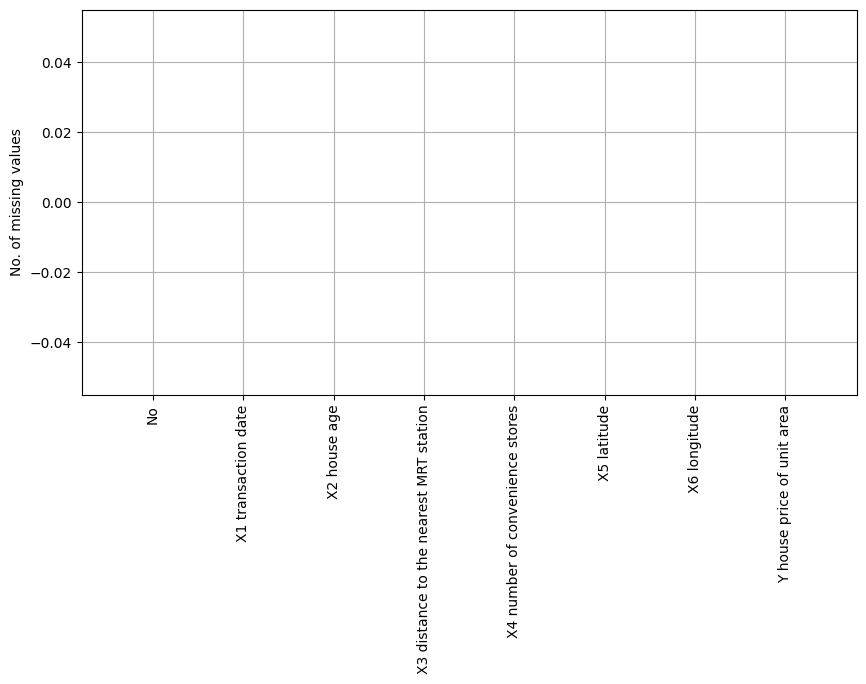

In [ ]:
data1 = df.isnull().sum().sort_values(ascending=False)
#nans = nans[nans > 0]
fig, ax = plt.subplots(figsize = (10,5))
ax.grid()
ax.bar(data1.index, data1.values, zorder=2, color='#efefdd')
#ax.set_xlim()
ax.set_ylabel("No. of missing values")
ax.xaxis.set_tick_params(rotation=90)
plt.show()
ax.grid()
# ax.bar(nans.index, nans.values, zorder=2, color="#3f72af")
# ax.set_ylabel("No. of missing values", labelpad=10)
# ax.set_xlim(-0.6, len(nans) - 0.4)
# ax.xaxis.set_tick_params(rotation=90)
# plt.show()

## Droping the unnecessary columns. 'No' Column is dropped.

In [ ]:
df = df.drop('No', axis=1)

In [ ]:
df.head()

X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0          2012.916667          32.0                                84.87882   
1          2012.916667          19.5                               306.59470   
2          2013.583333          13.3                               561.98450   
3          2013.500000          13.3                               561.98450   
4          2012.833333           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  
3                        54.8  
4                        43.1

transaction date, X2 house age, X3 distance to the nearest MRT station, X4 number of convenience stores, X5 latitude, X6 longitude, Y house price of unit area
# Univariate Data Distribution Analysis of each important variable using Histogram with KDE ( for checking Normality and Outliers)
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

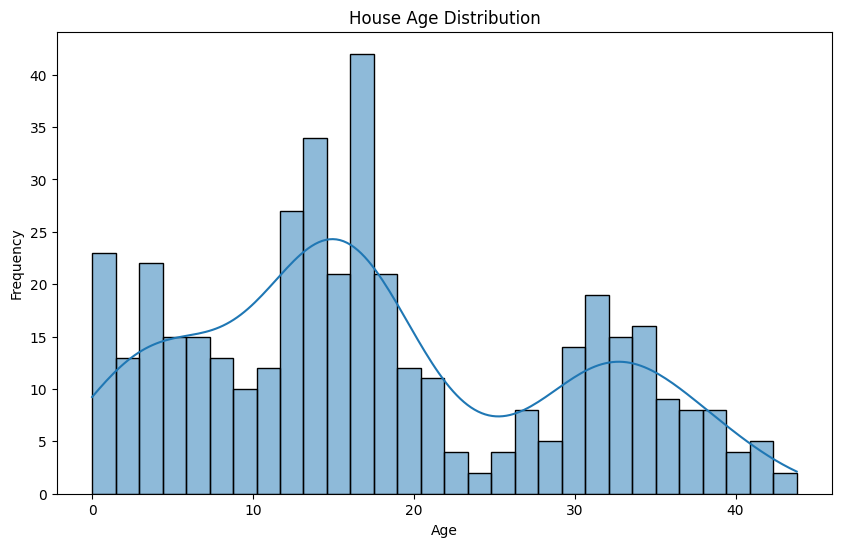

In [ ]:
# Histogram for House Age distribution
plt.figure(figsize=(10, 6))
sb.histplot(df['X2 house age'], bins=30, kde=True)
plt.title('House Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

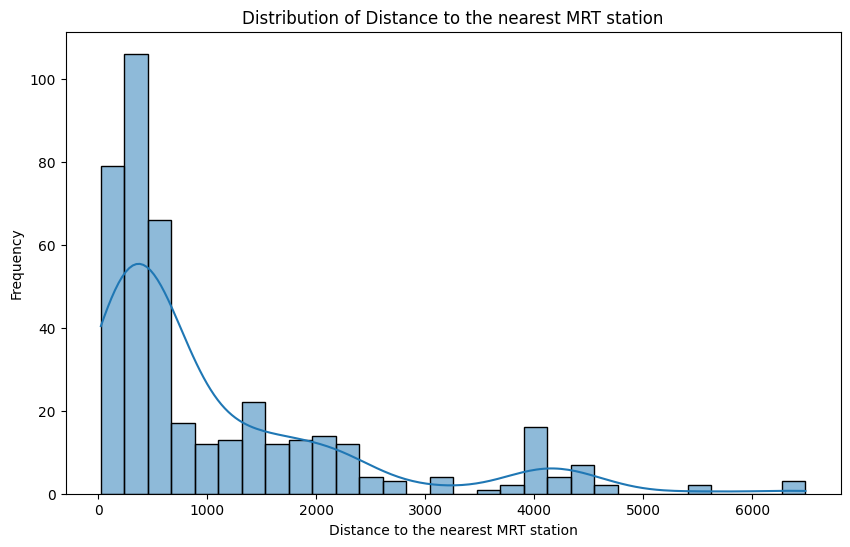

In [ ]:
# Histogram for X3 distance to the nearest MRT station distribution
plt.figure(figsize=(10, 6))
sb.histplot(df['X3 distance to the nearest MRT station'], bins=30, kde=True)
plt.title('Distribution of Distance to the nearest MRT station')
plt.xlabel('Distance to the nearest MRT station')
plt.ylabel('Frequency')
plt.show()

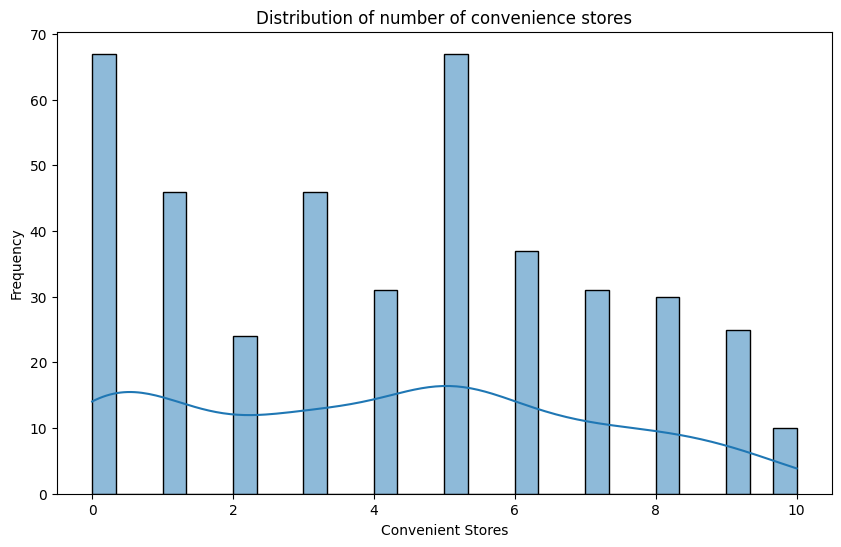

In [ ]:
# Histogram for Number of convenience stores distribution
plt.figure(figsize=(10, 6))
sb.histplot(df['X4 number of convenience stores'], bins=30, kde=True)
plt.title('Distribution of number of convenience stores')
plt.xlabel('Convenient Stores')
plt.ylabel('Frequency')
plt.show()

X5 latitude, X6 longitude, Y house price of unit area

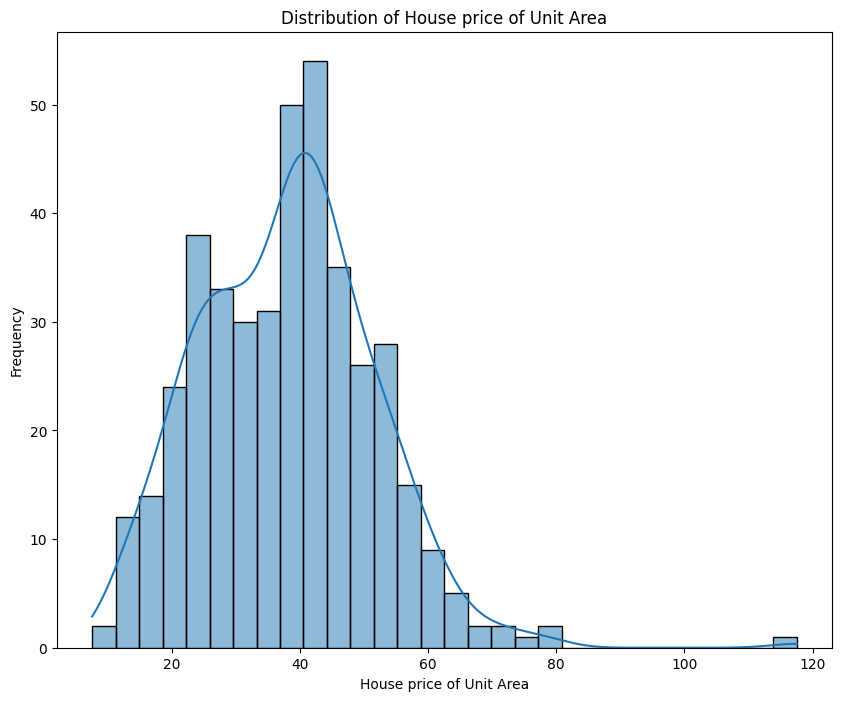

In [ ]:

# Histogram for Distribution house price of unit area
plt.figure(figsize = (10,8))
sb.histplot(df['Y house price of unit area'], bins=30,kde=True)
plt.title("Distribution of House price of Unit Area")
plt.xlabel('House price of Unit Area')
plt.ylabel('Frequency')
plt.show()



#1) OUTLIERS detection using Visual Inspection using Boxplots

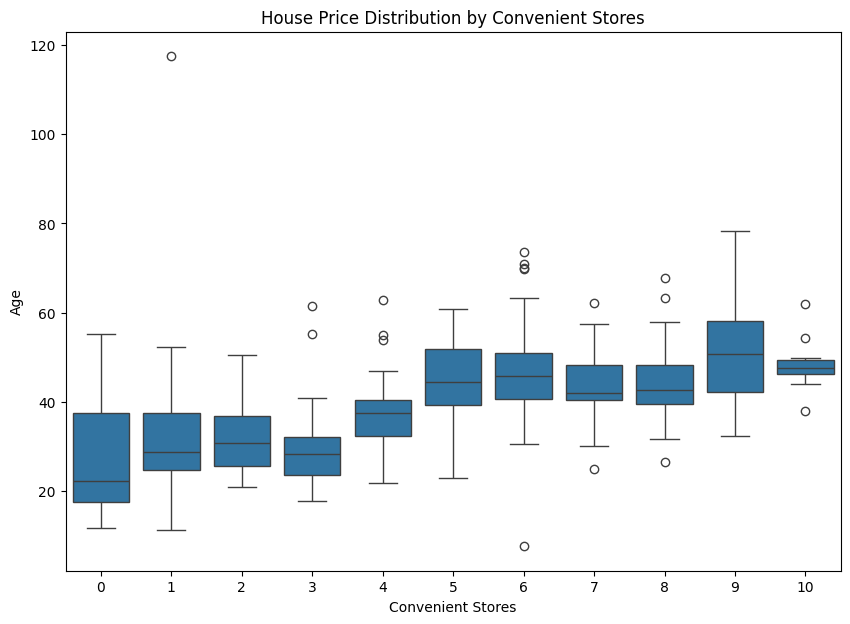

In [ ]:
# Bar plot for Distribution of Class by Age
import seaborn as sb
plt.figure(figsize=(10,7))
sb.boxplot(x='X4 number of convenience stores', y='Y house price of unit area',data=df)
plt.title('House Price Distribution by Convenient Stores')
plt.xlabel("Convenient Stores")
plt.ylabel("Age")
plt.show()

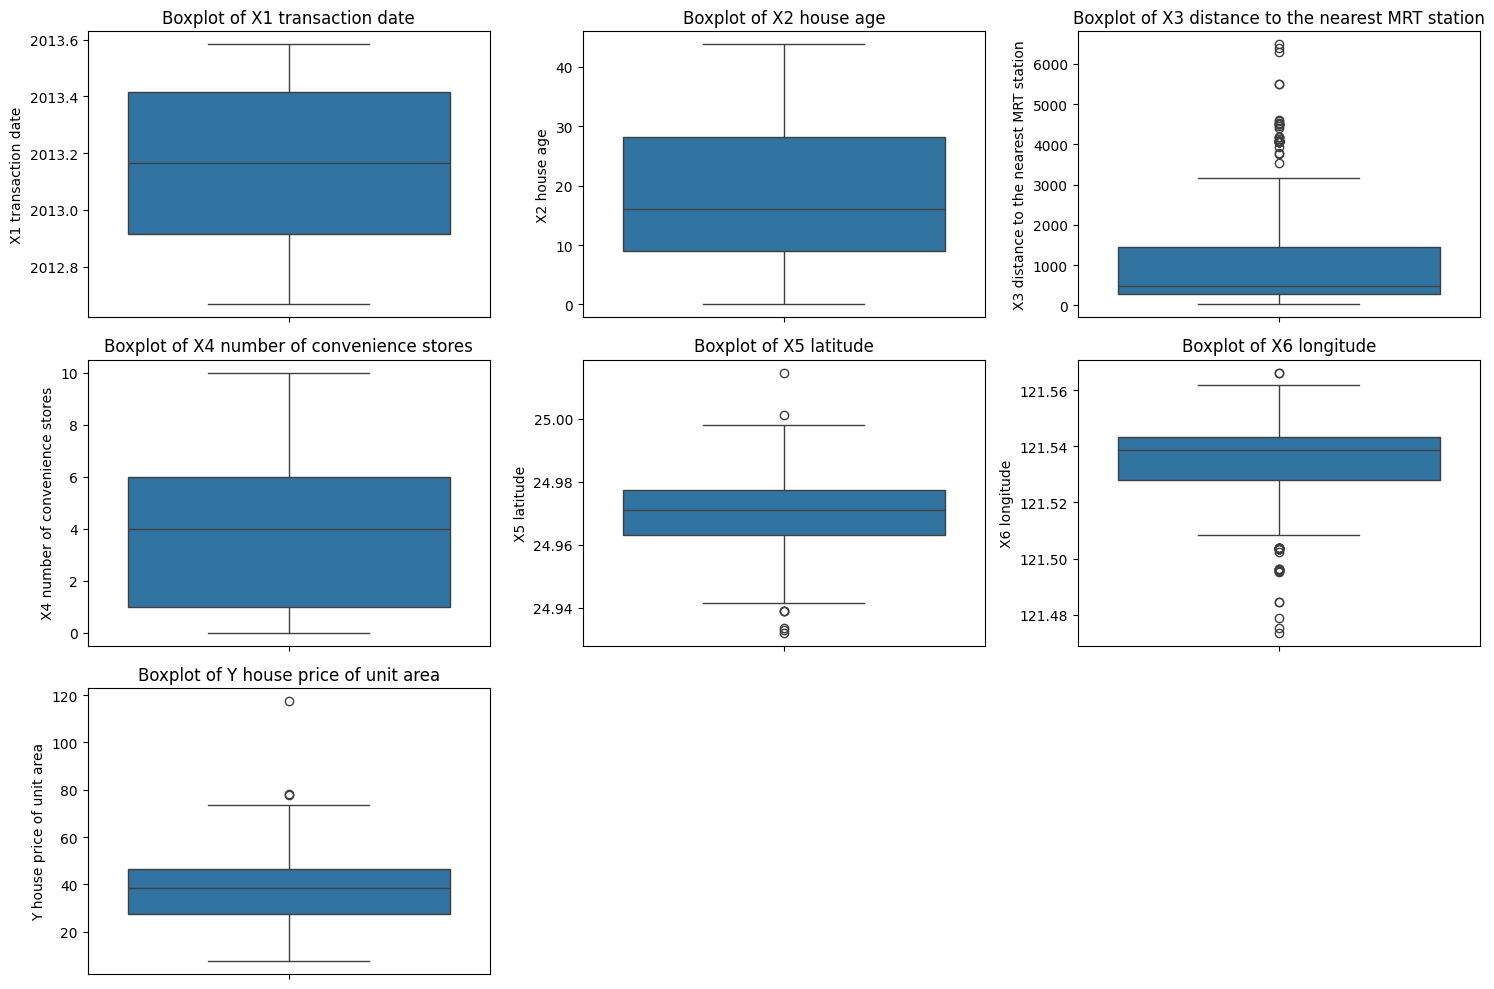

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sb.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


#2) Outliers detection using Standard Deviation Method
Outliers can be defined as data points that lie beyond a specified number of standard deviations from the mean.
### Defining a function to find the outlier using the Standard Deviation


In [ ]:
# Define a function to find outliers using standard deviation
def find_outliers_std(df, column, threshold=3):
    mean = df[column].mean()
    std_dev = df[column].std()
    outliers = df[(df[column] > mean + threshold * std_dev) | (df[column] < mean - threshold * std_dev)]
    return outliers

# Find outliers for each column
for column in df.columns:
    outliers = find_outliers_std(df, column)
    print(f'Outliers in {column}:')
    print(outliers)
    print()


Outliers in X1 transaction date:
Empty DataFrame
Columns: [X1 transaction date, X2 house age, X3 distance to the nearest MRT station, X4 number of convenience stores, X5 latitude, X6 longitude, Y house price of unit area]
Index: []

Outliers in X2 house age:
Empty DataFrame
Columns: [X1 transaction date, X2 house age, X3 distance to the nearest MRT station, X4 number of convenience stores, X5 latitude, X6 longitude, Y house price of unit area]
Index: []

Outliers in X3 distance to the nearest MRT station:
     X1 transaction date  X2 house age  \
8            2013.500000          31.7   
116          2013.000000          30.9   
249          2012.833333          18.0   
255          2013.416667          31.5   
347          2013.583333          17.4   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
8                                  5512.038                                1   
116                                6396.283                                1

#3) Outlier detection using the Interquartile Range (IQR) Method
The IQR method identifies outliers as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

In [ ]:
# Define a function to find outliers using the IQR method
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Find outliers for each column
for column in df.columns:
    outliers = find_outliers_iqr(df, column)
    print(f'Outliers in {column} using IQR:')
    print(outliers)
    print()


Outliers in X1 transaction date using IQR:
Empty DataFrame
Columns: [X1 transaction date, X2 house age, X3 distance to the nearest MRT station, X4 number of convenience stores, X5 latitude, X6 longitude, Y house price of unit area]
Index: []

Outliers in X2 house age using IQR:
Empty DataFrame
Columns: [X1 transaction date, X2 house age, X3 distance to the nearest MRT station, X4 number of convenience stores, X5 latitude, X6 longitude, Y house price of unit area]
Index: []

Outliers in X3 distance to the nearest MRT station using IQR:
     X1 transaction date  X2 house age  \
8            2013.500000          31.7   
30           2013.500000          25.9   
35           2013.500000          13.9   
40           2013.000000          13.6   
41           2013.500000          16.8   
48           2013.416667          24.2   
49           2012.666667          29.4   
58           2013.500000          30.3   
73           2013.166667          13.8   
87           2013.583333          16.9 

#4) OUTLIER Detection using Z-Score Method

The Z-score method identifies outliers as data points with Z-scores beyond a certain threshold, typically 3 or -3.

In [ ]:
df.shape

(414, 7)

In [ ]:
# from scipy.stats import zscore



# # Calculate Z-scores for each column
# z_scores = np.abs(zscore(df))

# # Find outliers
# threshold = 3
# outliers = np.where(z_scores > threshold)
# outliers = list(zip(*outliers))

# # Display outliers
# for column, row in outliers:
#     print(f'Outlier in {df.columns[column]} at row {row}: {df.iloc[row, column]}')
################3
# from scipy.stats import zscore

# # Calculate Z-scores for the entire dataframe
# z_scores = np.abs(zscore(df))

# # Define a threshold for identifying outliers
# threshold = 3

# # Iterate through each column to find and print outliers using Z-score method
# for i, column in enumerate(df.columns):
#     # Identify outliers in the column
#     outliers = df[z_scores[:, i] > threshold]
#     print(f'Outliers in {column} using Z-score:')
#     if not outliers.empty:
#         print(outliers[[column]])
#     else:
#         print("No outliers found.")
#     print()


#Finding Numerical and Discrete variables for Bivariate data Analysis
Numerical and Discrete Values

In [ ]:

numerical_features=[]
for feature in df:
    if df[feature].dtype!='O' and feature!= 'Y house price of unit area':
        numerical_features.append(feature)

discrete_variables=[]
for feature in numerical_features:
    if len(df[feature].unique())<=25 and feature != 'Y house price of unit area':
        discrete_variables.append(feature)


In [ ]:
print("Numerical Features: " , numerical_features)
print("Discrete Features: ", discrete_variables)

Numerical Features:  ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
Discrete Features:  ['X1 transaction date', 'X4 number of convenience stores']


# The Bivariate distribution Analysis on discrete_variables through Visualization
The bivariate distribution are statistical methods used to show the probability of two random variables occurring. One of the most common methods used to display this information is with a table.


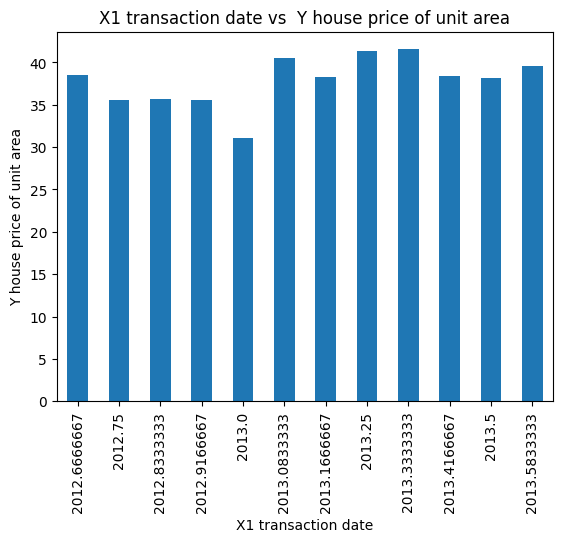

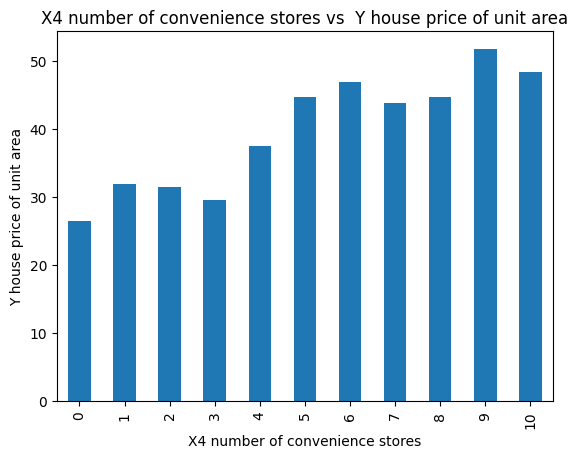

In [ ]:
for feature in discrete_variables:
  #if feature not in ['X1 transaction date']:
  df.groupby(feature)['Y house price of unit area'].mean().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('Y house price of unit area')
  plt.title(feature +' vs '+' Y house price of unit area')
  plt.show()

# Continous Value Distribution

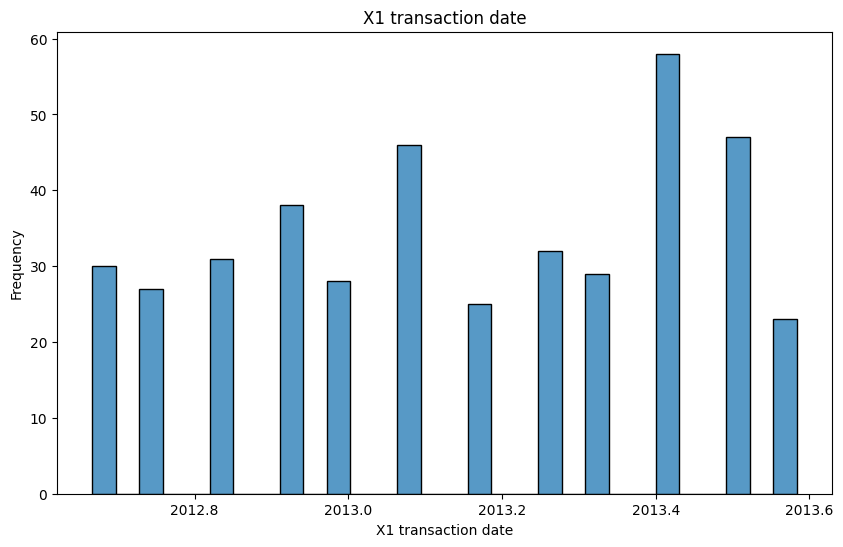

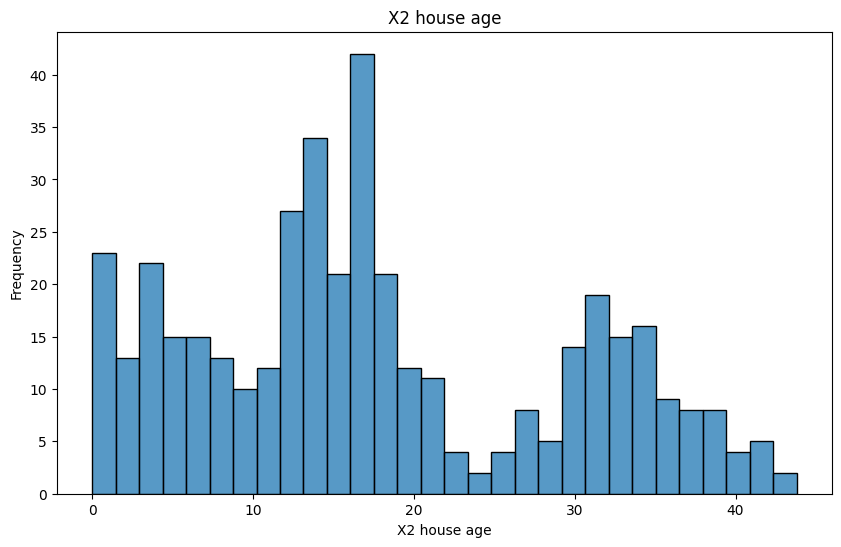

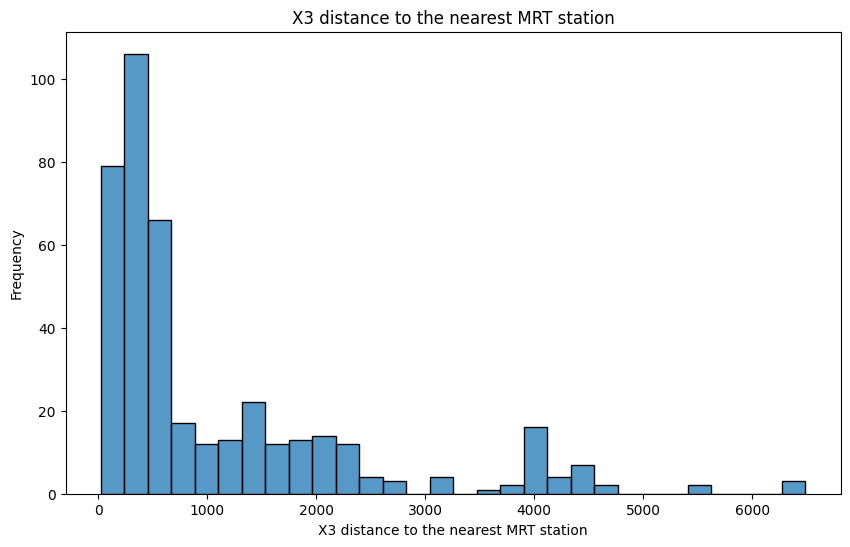

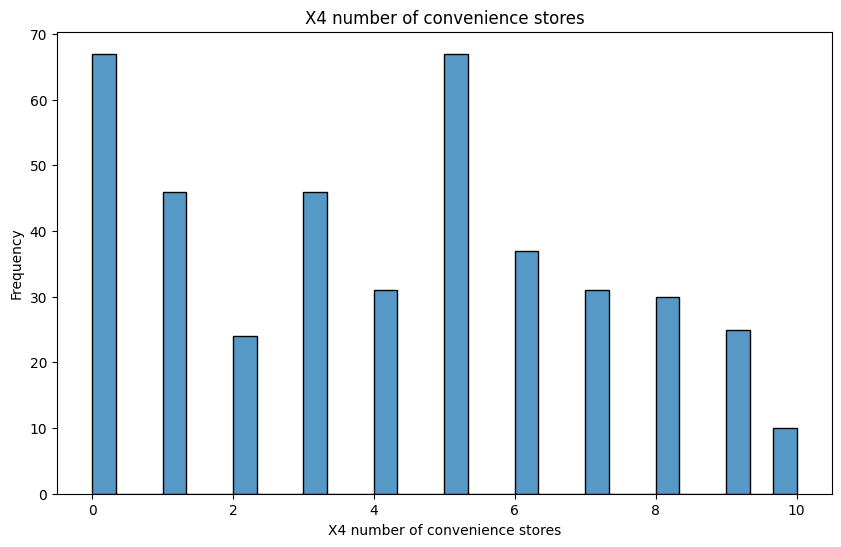

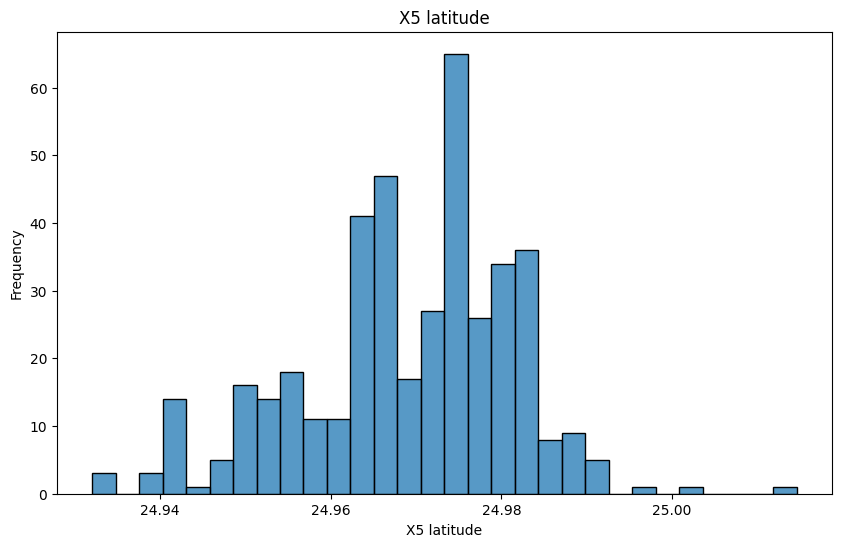

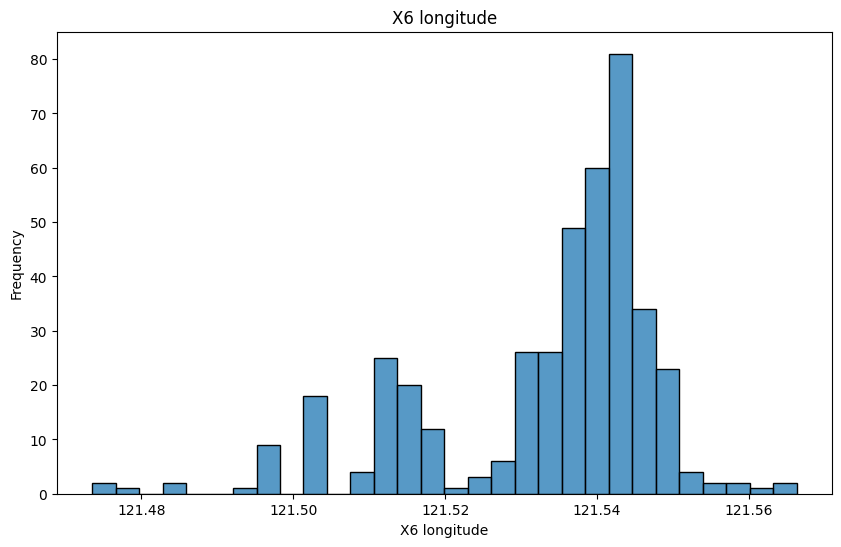

In [ ]:
# for i in numerical_features:
#   df[i].hist(bins=30)
#   plt.title(i)
#   plt.show
#     #  train_data[feature].hist(bins=30)
#     #  plt.title(feature)
#     #  plt.show()
for i in numerical_features:
  plt.figure(figsize=(10, 6))
  sb.histplot(df[i], bins=30)
  plt.title(i)
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.show()

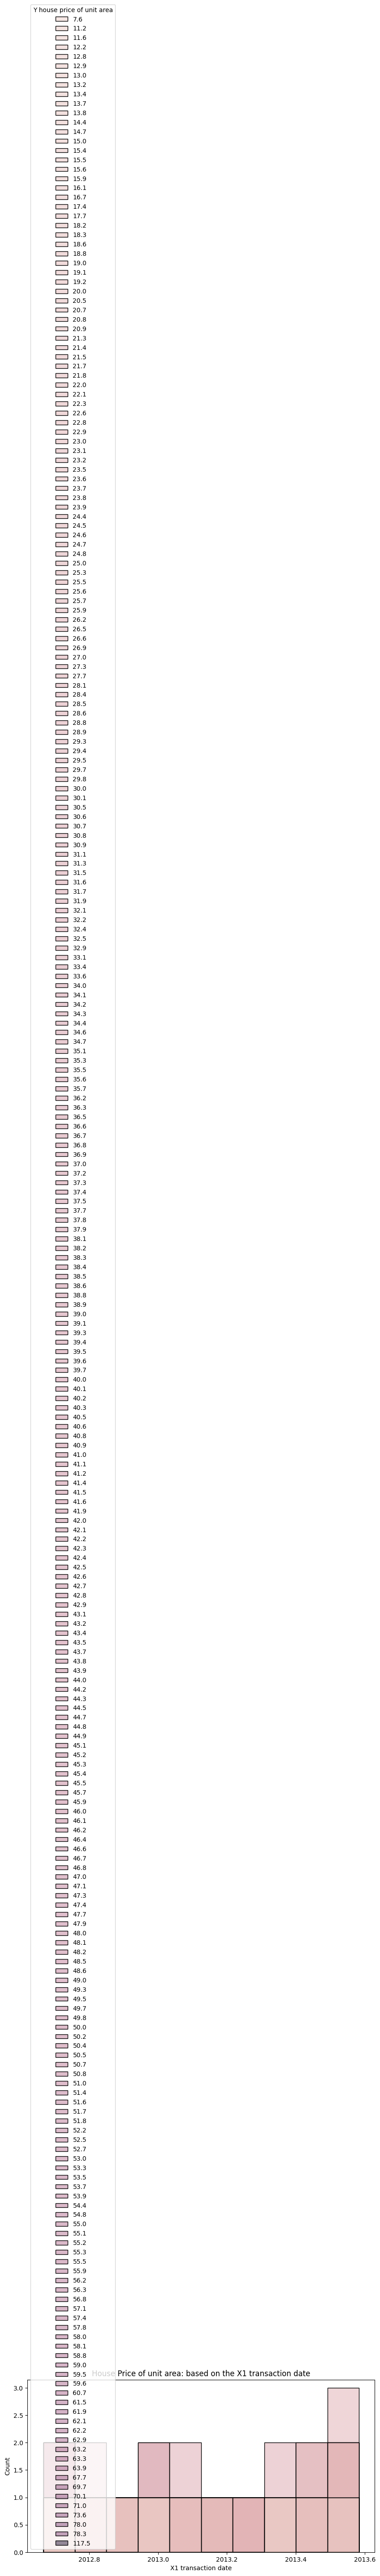

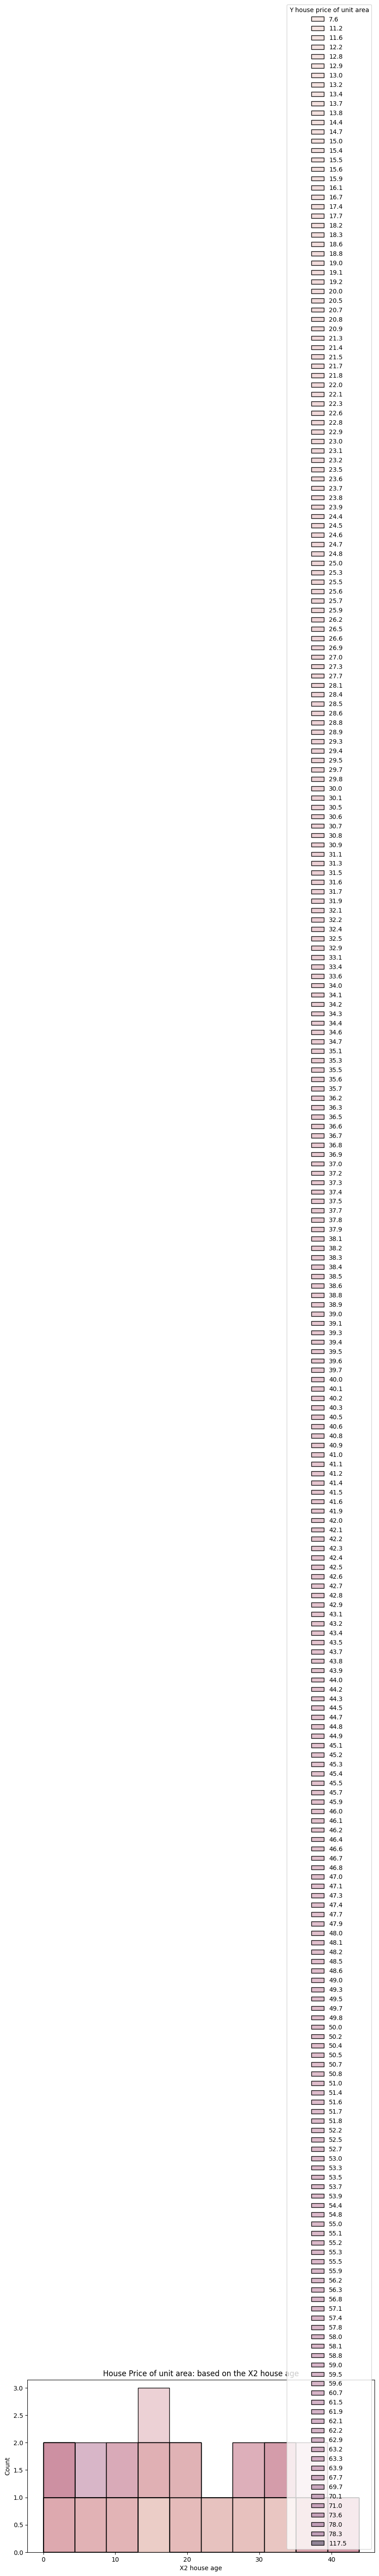

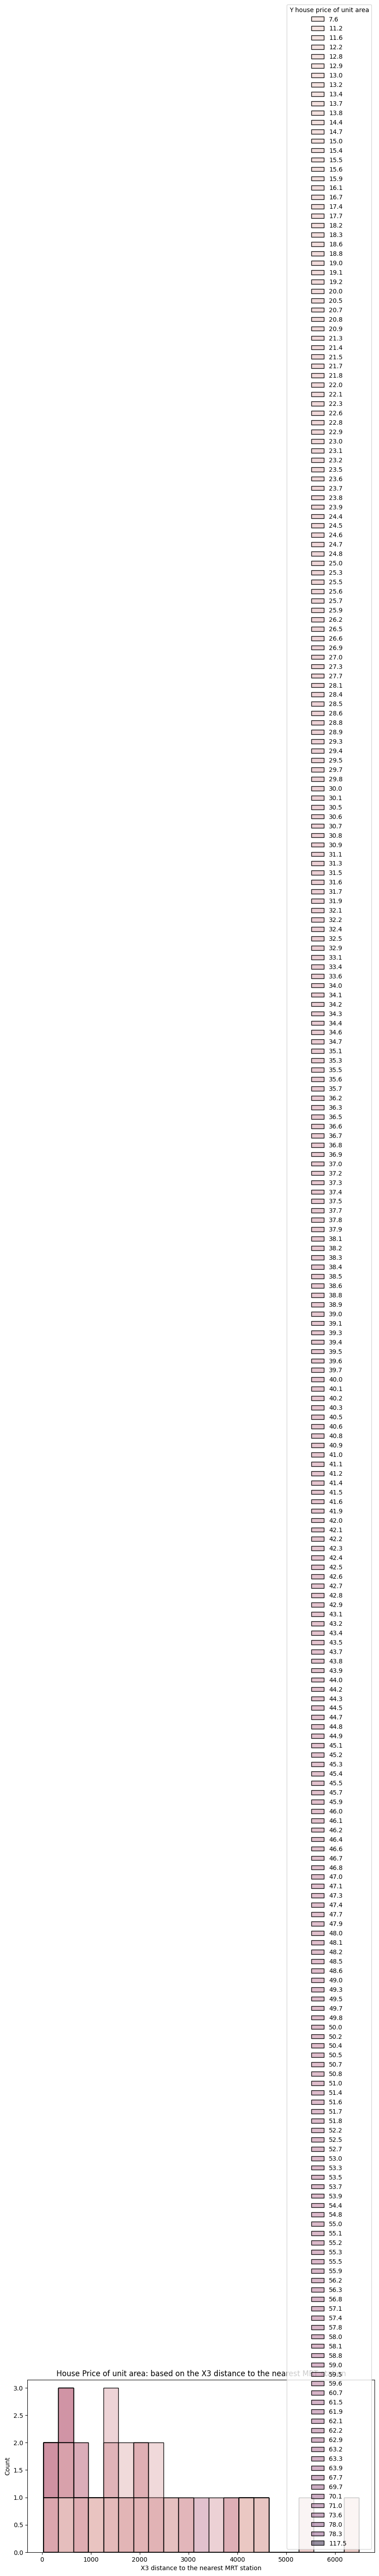

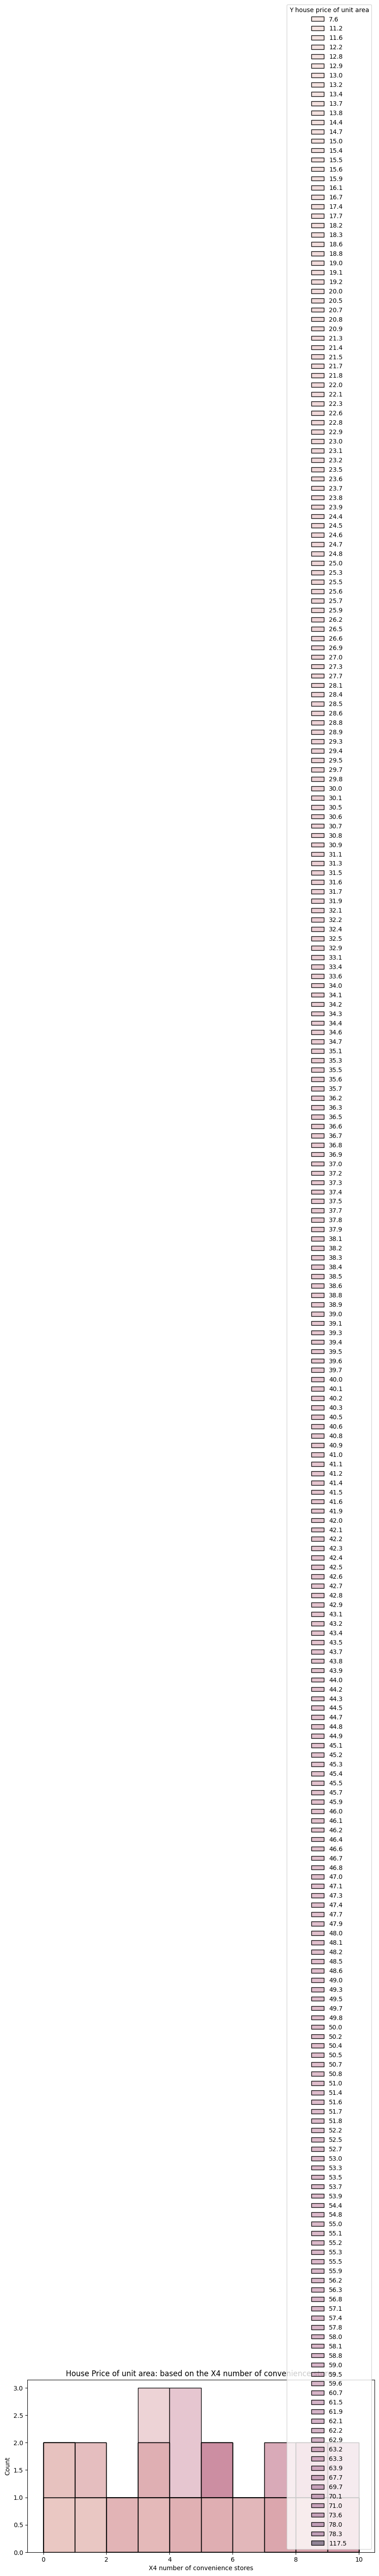

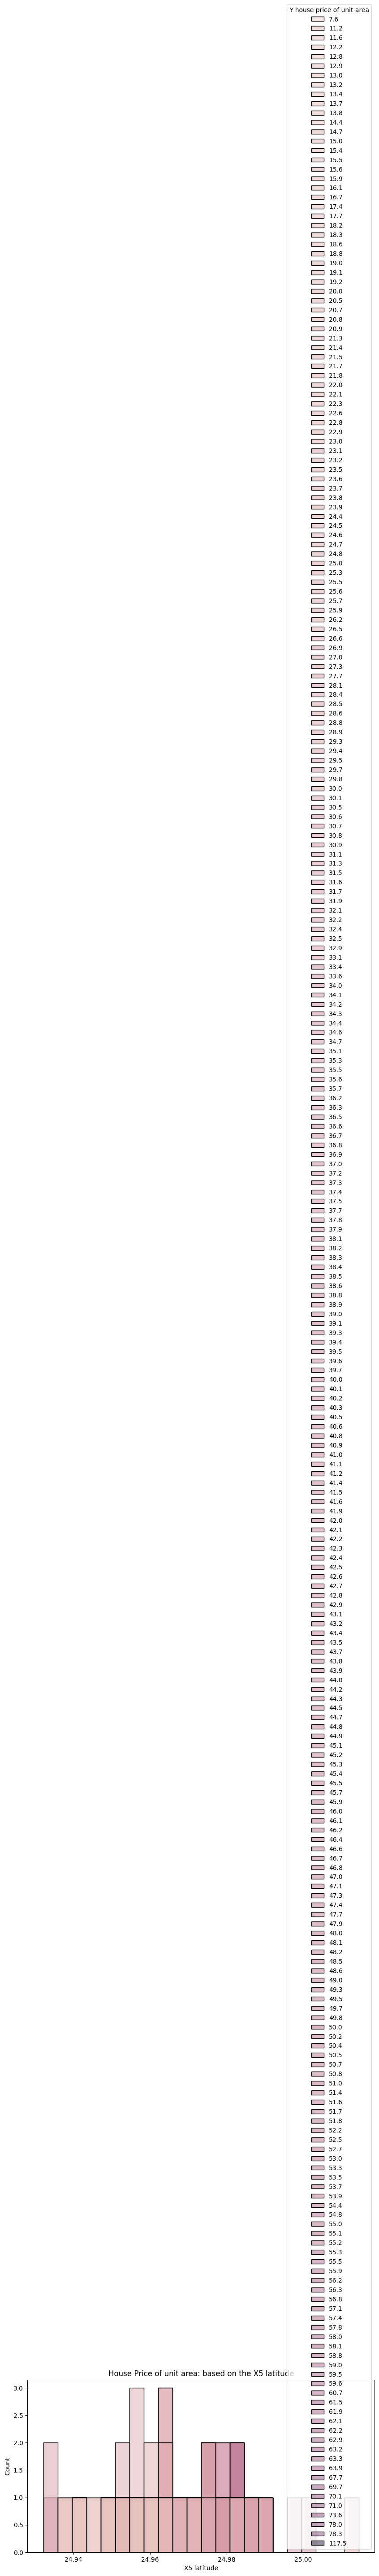

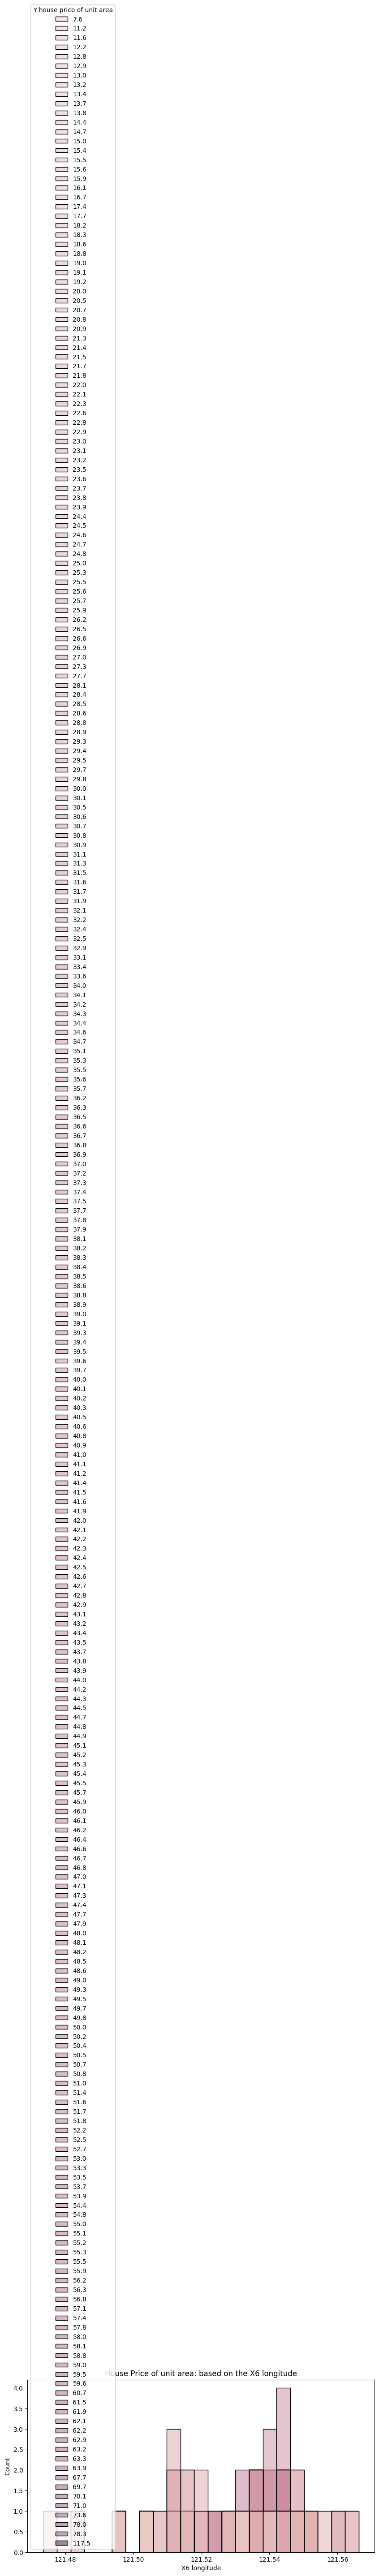

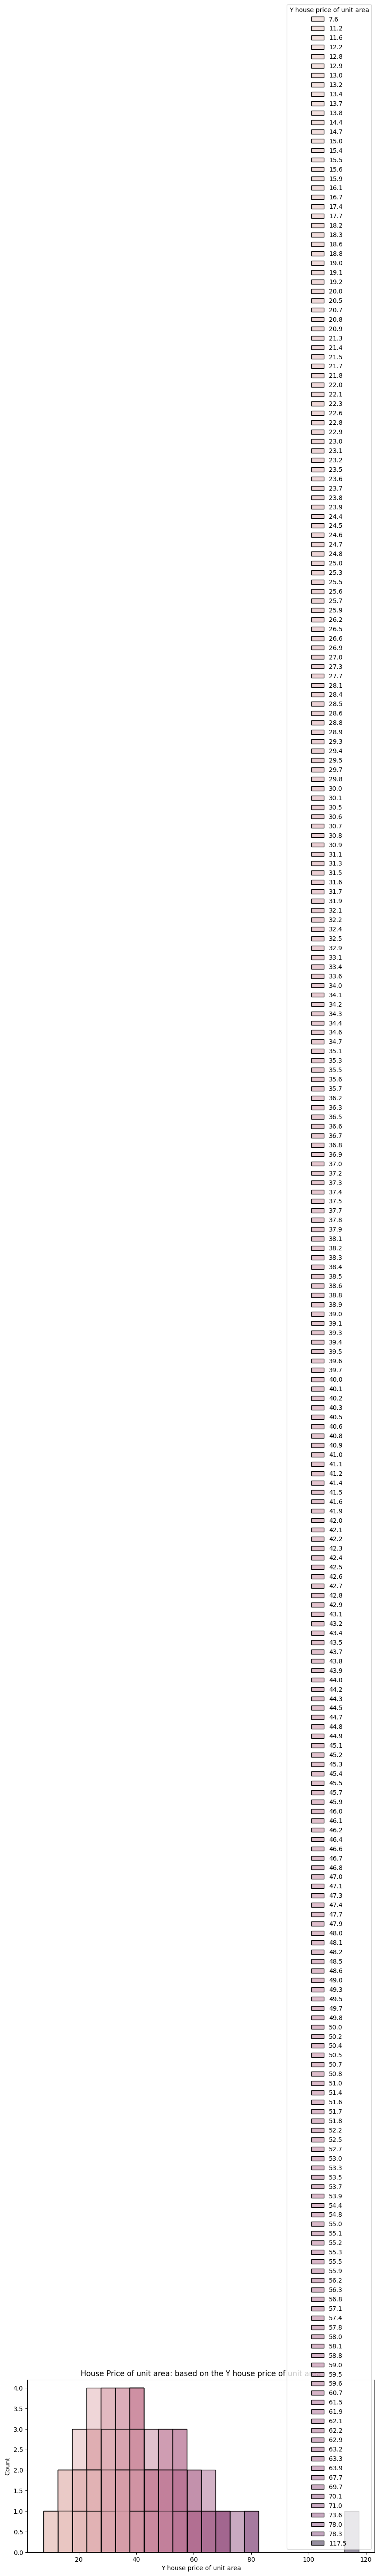

In [ ]:

for i in df.columns:
    plt.figure(figsize=(10,5))
    plt.title("House Price of unit area: based on the "+ i)
    sb.histplot(x=i, hue="Y house price of unit area", data=df)
    plt.show()


# Based on above correlation function:
### X3 distance to the nearest MRT station has a strong negative correlation with "Y house price of unit area"
### X4 number of convenience stores, X5 latitude and X6 longitude have a strong Positive correlation with "Y house price of unit area"
### X2 house age is less negatively correlated with "Y house price of unit area" in comparision to "X3 MRT station"

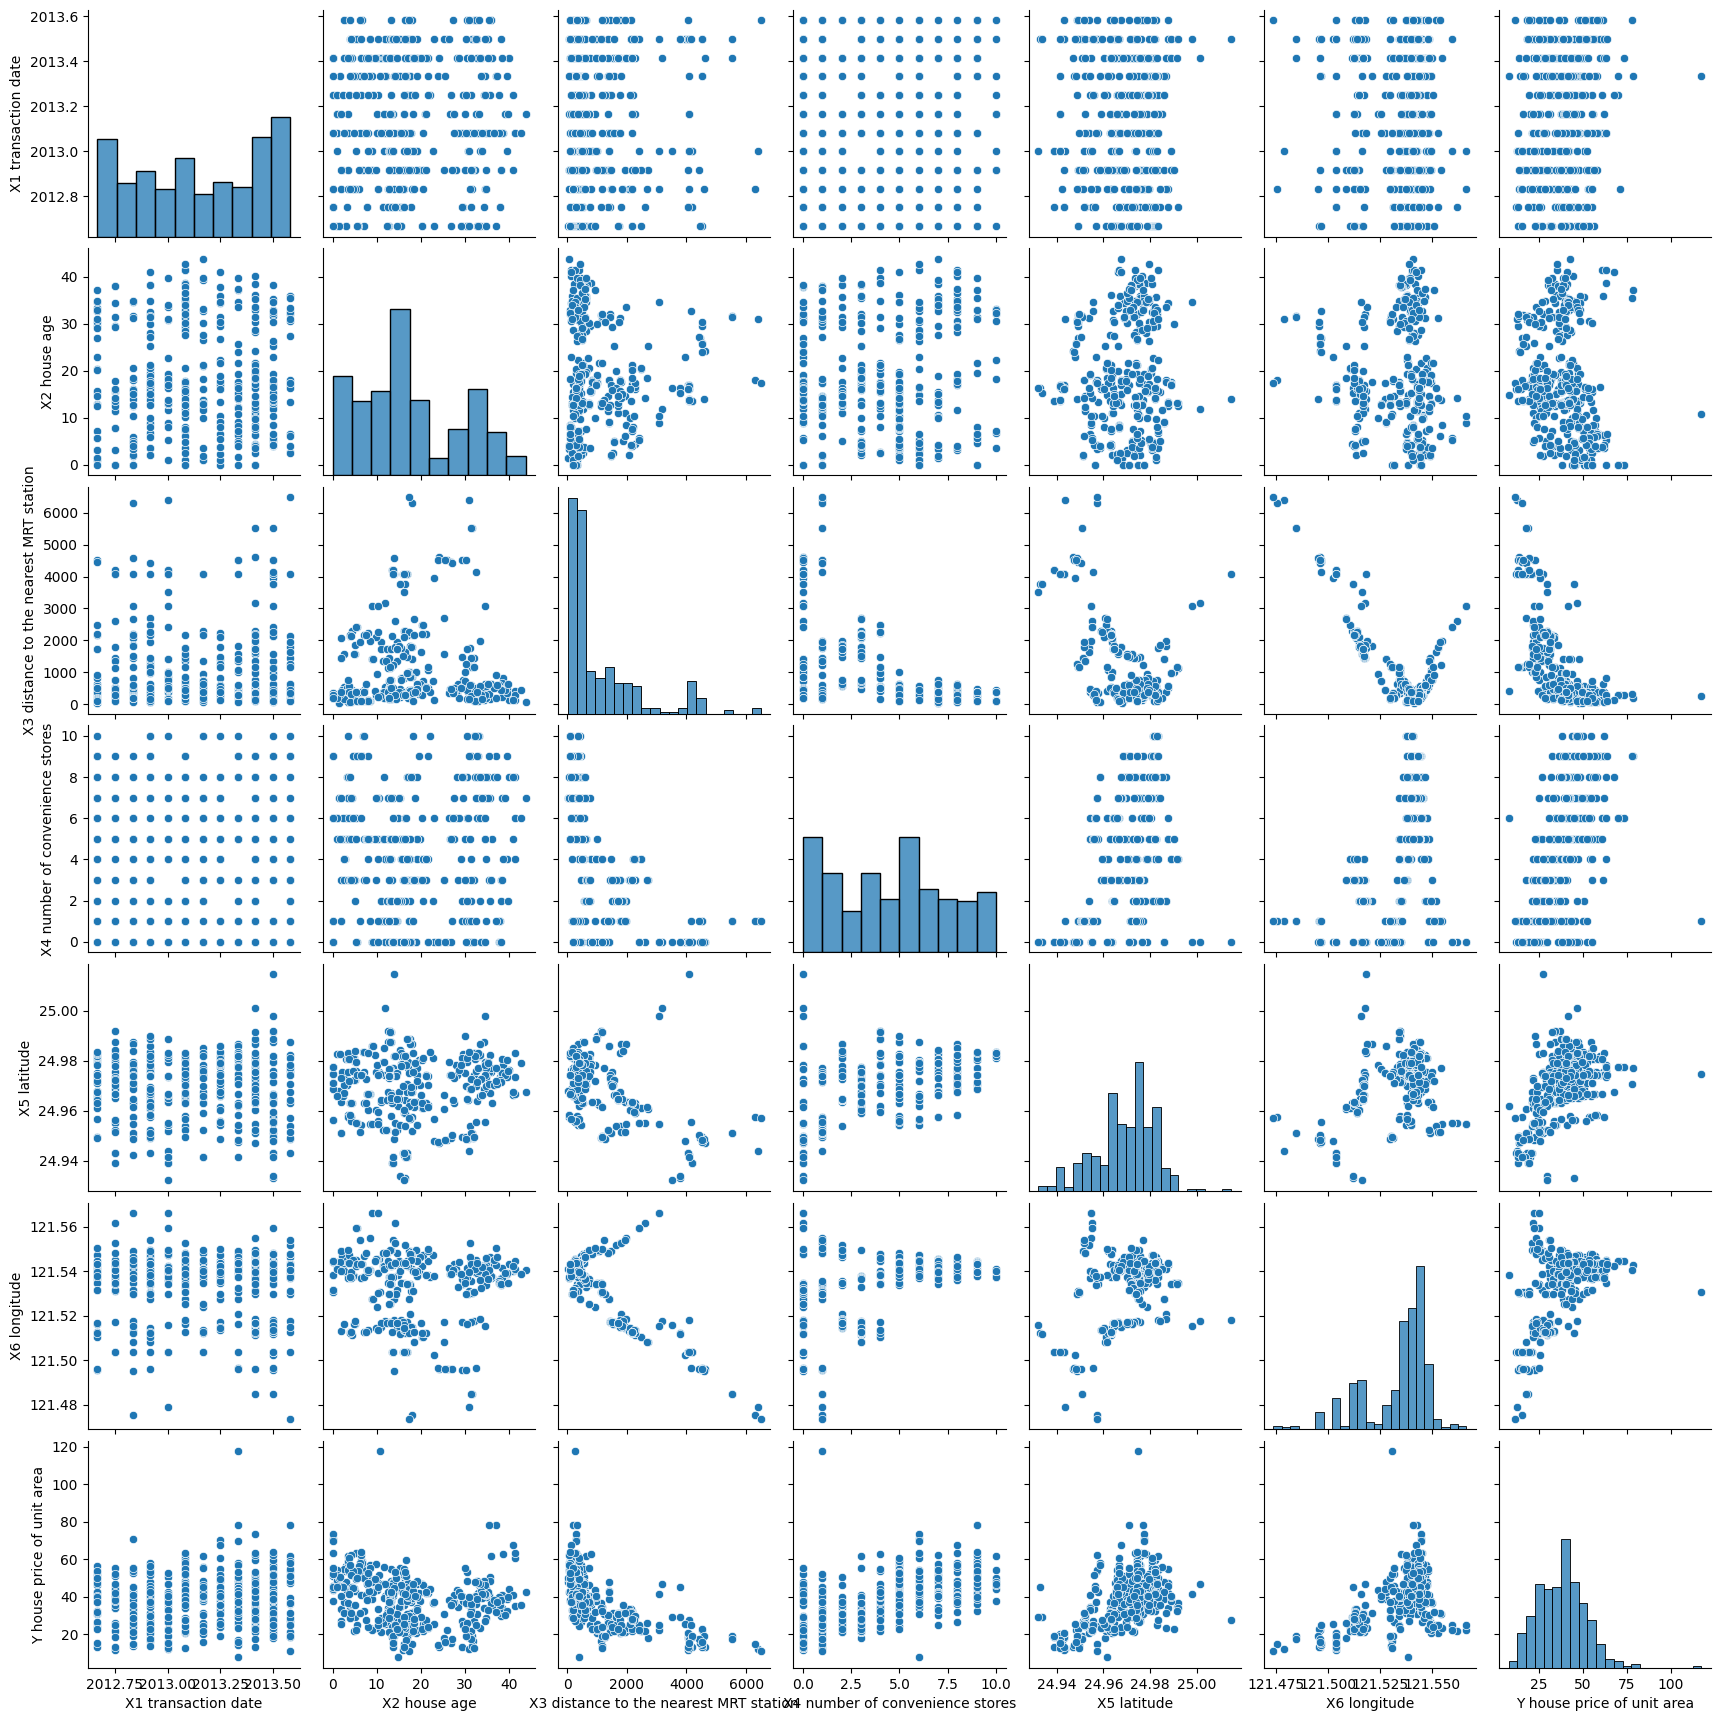

In [ ]:
sb.pairplot(df)

#Evaluating the Correlation Coefficients between the Label('Y house price of unit area') and 6 features of the House Price Dataset

In [ ]:
#Evaluating the Correlation Coefficients between the Label('Y house price of unit area') and 6 features of the House Price Dataset
df.corr()['Y house price of unit area'].sort_values(ascending=False).round(9)


Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087529
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

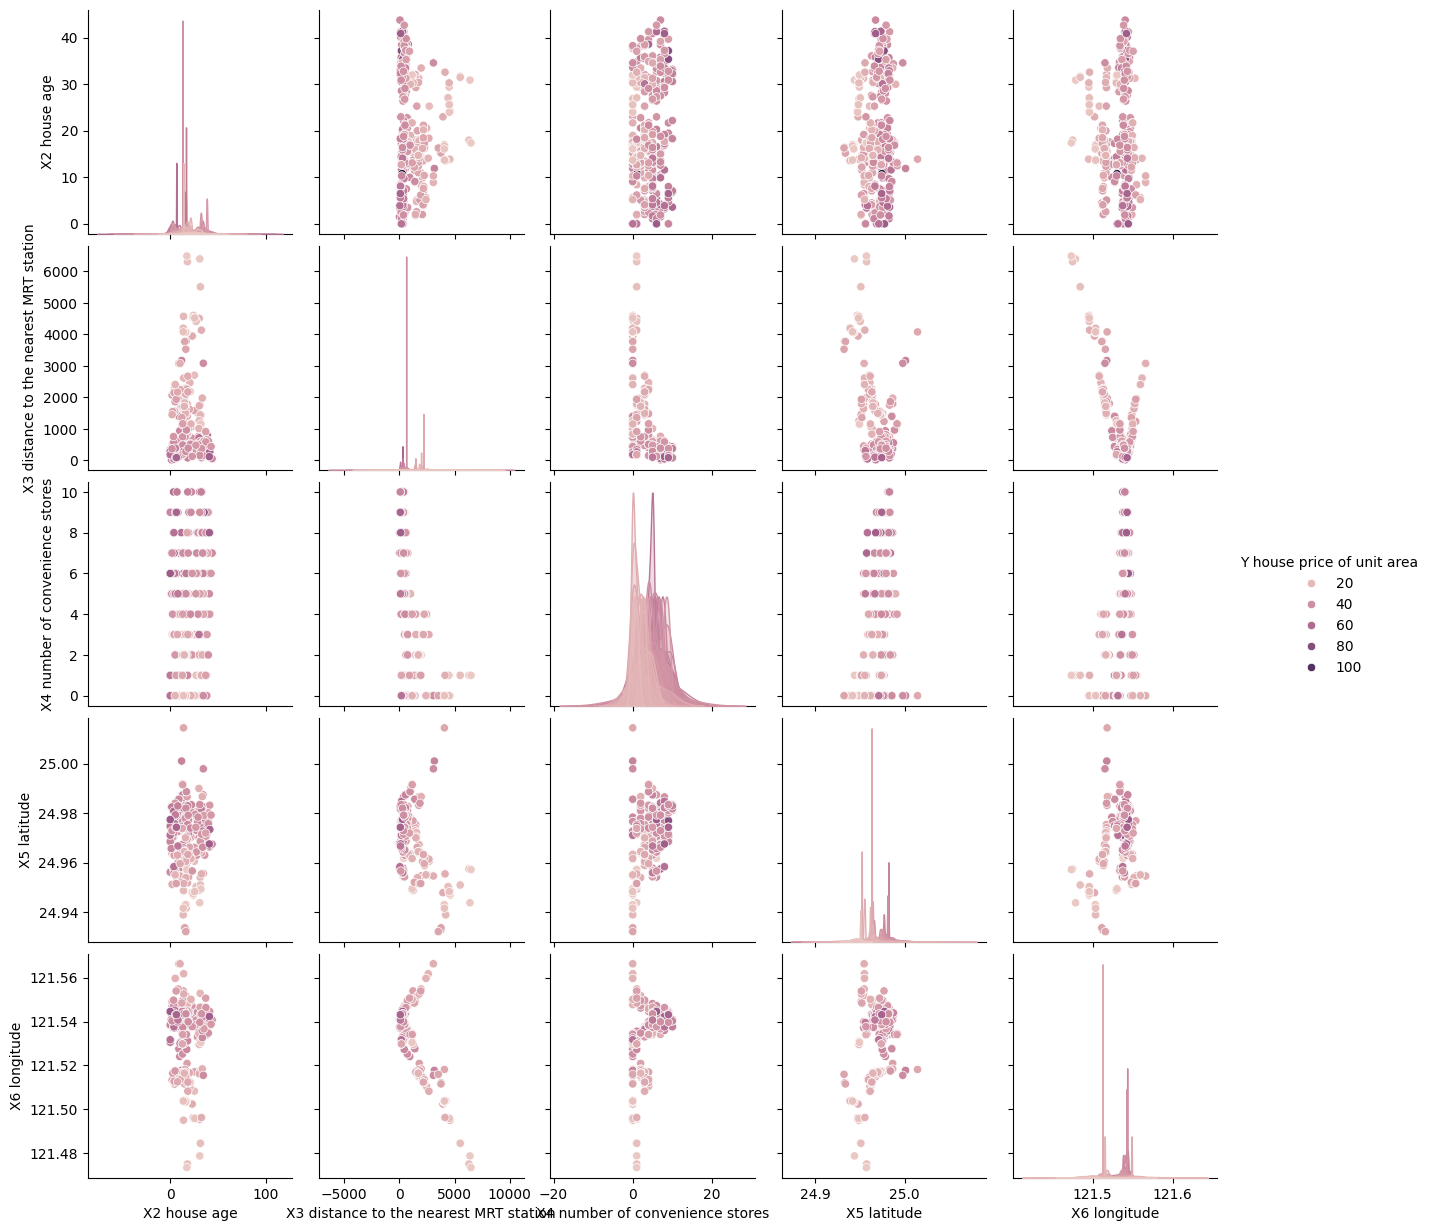

In [ ]:
required_columns = ['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores', 'X5 latitude','X6 longitude','Y house price of unit area']
sb.pairplot(df[required_columns],hue='Y house price of unit area')

# Splitting the Features and Labels as X and Y

In [ ]:
x = df.drop('Y house price of unit area',axis=1)
y = df['Y house price of unit area']

In [ ]:
x.head()

X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0          2012.916667          32.0                                84.87882   
1          2012.916667          19.5                               306.59470   
2          2013.583333          13.3                               561.98450   
3          2013.500000          13.3                               561.98450   
4          2012.833333           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  
0                               10     24.98298     121.54024  
1                                9     24.98034     121.53951  
2                                5     24.98746     121.54391  
3                                5     24.98746     121.54391  
4                                5     24.97937     121.54245

In [ ]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

# Split the data into training and testing datasets for Linear Regression Machine Learning

In [ ]:
# Split the data into training and testing datasets for Machine Learning
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Training the Model using Linear Regression Algorithm

In [ ]:

model = LinearRegression()

# Training the model using the training data
model.fit(X_train, Y_train)


LinearRegression()

#Predicting the model using the Testing dataset


In [ ]:

# Predicting the test dataset results
Y_pred = model.predict(X_test)


In [ ]:
Y_pred

array([47.88459638, 41.16372456, 44.27471873, 40.19524337, 27.51036657,
       45.11261977, 44.63062482, 46.36380715, 23.61796155, 54.33761689,
       34.07515919, 36.54638795, 37.55277307, 23.28016222, 35.26782236,
       34.38222451, 43.35534033, 45.408569  , 30.06860516, 44.09363945,
        0.73475644, 34.99173057, 48.22771739, 45.48739511, 11.5983974 ,
       39.69888192, 12.71367676, 42.91390312, 34.93208184, 37.28125916,
       13.17927474, 40.12957477, 35.2157917 , 27.71513415, 46.40128128,
       31.22090469, 50.89833165, 14.07291458, 49.0566748 , 40.05562036,
       38.24866156, 40.6308276 , 47.01426396, 37.65499606, 39.85706782,
       46.88361757, 43.72185534, 20.94275379, 47.41260558, 45.40337235,
       48.3382014 , 48.98881763, 42.27306626, 42.58254818, 36.04247664,
       14.95304574, 36.6137818 , 34.87930421, 28.33633832, 45.91020213,
       33.19449963, 32.19086103, 14.95304574,  8.86241923, 10.36395072,
       34.11159942, 28.47910808, 46.59728248, 32.96498733, 31.47

In [ ]:
# Y = mx + c
# C is intercept and m is the coeff
c = model.intercept_
print("the Intercept is: ", c)

the Intercept is:  -13048.143379370988


In [ ]:
m = model.coef_
print("the Coefficient is: ", m)

the Coefficient is:  [ 5.44326242e+00 -2.70794297e-01 -4.75868310e-03  1.09146922e+00
  2.29049043e+02 -2.95033895e+01]


#Calculating the Performance metrics of the trained Linear regression model
What is a good MSE value for regression?<br/>
MSE will never be negative since the errors are squared. The value of the error ranges from zero to infinity. MSE increases exponentially with an increase in error. A good model will have an MSE value closer to zero, indicating a better goodness of fit to the data
<br/>

R Squared, indicating the extent of influence a specific independent variable exerts on the dependent variable. Typically ranging between 0 and 1, values below 0.3 suggest weak influence, while those between 0.3 and 0.5 indicate moderate influence

In [ ]:

# Calculating the performance metrics of the trained model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 53.502252361179515
R-squared: 0.6810781244679265


###Interpretation of Result
Mean Squared Error: 54.598848304992806 is not closer to zero

R-squared: 0.674541419569208 is greater than 0.5 threshold which indicated that An R² value of 0.6745 is 67.45% of the variance in the target variable (Y) is explained by the model. This is an good value, suggesting that the model fits the data well. However, must check the Assumptions to check the of the model performance fir this dataset

In [ ]:
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print("Y_test", Y_test.shape)

X_train (331, 6)
Y_train (331,)
X_test (83, 6)
Y_test (83,)


#1. Check Linearity
The assumption that the relationship between the predictors and the response variable is linear.



checking the scatter plot with specific feature(MRT station) of the X_train
Since X_train has multiple features, we need to decide which feature to plot against Y_train. For simplicity, let's plot the specific feature(MRT station) in X_train against Y_train.

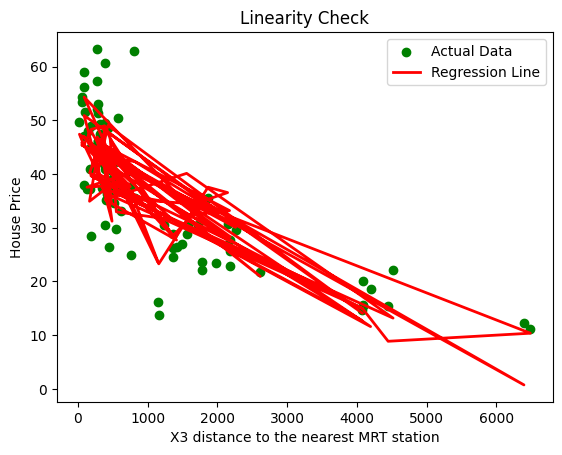

In [ ]:
# Check Linearity: The assumption that the relationship between the predictors and the response variable is linear
plt.scatter(X_test.loc[:, 'X3 distance to the nearest MRT station'], Y_test, color='green', label='Actual Data')
plt.plot(X_test.loc[:, 'X3 distance to the nearest MRT station'], Y_pred, color='red', linewidth=2, label='Regression Line')
plt.title("Linearity Check")
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('House Price')
plt.legend()
plt.show()


# Checking the Linearity on Training and Test Data
The assumption that the relationship between the predictors and the response variable is linear.
Sorting by a particular feature can make the plot easier to interpret, but you should ensure that this feature is representative of the overall trend.

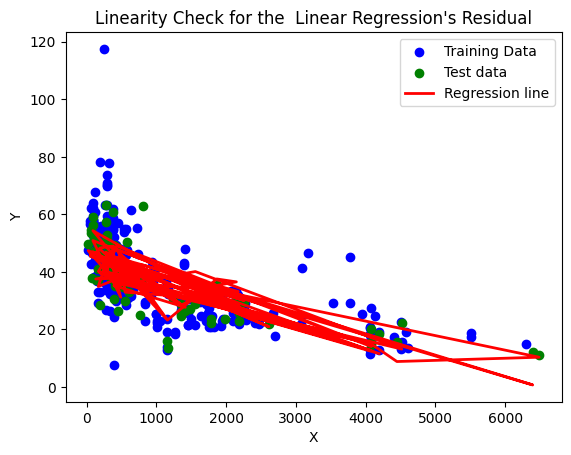

In [ ]:
# checking the scstter plot with X3 distance to the nearest MRT station feature of the X_train
plt.scatter(X_train.loc[:,'X3 distance to the nearest MRT station'], Y_train, color="blue", label="Training Data" )
# Ploting  the test data
plt.scatter(X_test.loc[:,'X3 distance to the nearest MRT station'], Y_test, color='green', label='Test data')
# Ploting  the regression line for the "data_for_lr.csv" dataset
plt.plot(X_test.loc[:,'X3 distance to the nearest MRT station'], Y_pred, color='red', linewidth=2, label='Regression line')

plt.title("Linearity Check for the  Linear Regression's Residual")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# The Regression line is not straight.
zig-zag appearance in the regression line usually indicates that the data points are not sorted by the feature used for plotting, leading to a non-smooth plot of the regression line.

# 1. Checking the Linearity on Sorted values
###Visualization of Regression Line on Sorted values of "X3 distance to the nearest MRT station"

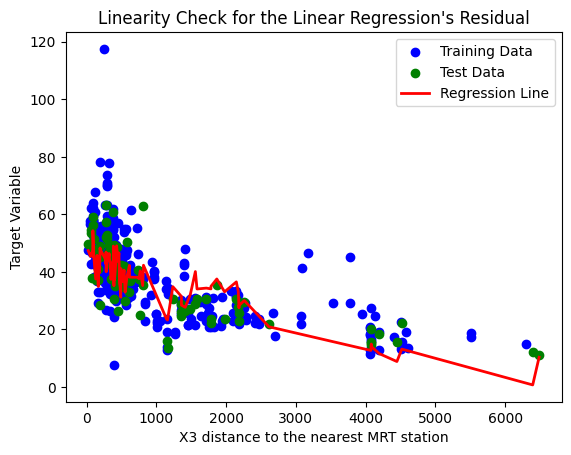

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the values for the feature 'X3 distance to the nearest MRT station'
X_train_values = X_train.loc[:, 'X3 distance to the nearest MRT station'].values
X_test_values = X_test.loc[:, 'X3 distance to the nearest MRT station'].values

#sorted_idx = X_test.loc[:, 'X3 distance to the nearest MRT station'].argsort() # Direct Sorting gives error
# Because direct column sorting gives error, so the values are pulled first and then sorted

# Get the sorted indices
sort_train_idx = np.argsort(X_train_values)
sort_test_idx = np.argsort(X_test_values)

# Sort X_train, Y_train, X_test, and Y_pred using these indices
X_train_sorted = X_train_values[sort_train_idx]
Y_train_sorted = Y_train.values[sort_train_idx]

X_test_sorted = X_test_values[sort_test_idx]
Y_pred_sorted = Y_pred[sort_test_idx]

# Plotting the training data
plt.scatter(X_train_sorted, Y_train_sorted, color="blue", label="Training Data")
# Plotting the test data
plt.scatter(X_test_sorted, Y_test.values[sort_test_idx], color='green', label='Test Data')
# Plotting the regression line for the sorted test data
plt.plot(X_test_sorted, Y_pred_sorted, color='red', linewidth=2, label='Regression Line')

plt.title("Linearity Check for the Linear Regression's Residual")
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Target Variable')
plt.legend()
plt.show()


# 2.1 Checking Residuals for INDEPENDENCE i.e., Random Distribution:
Purpose: The below plot directly checks if there is any pattern in residuals against the predicted values. It helps in assessing if there's any structure left in the residuals that the model did not capture (residual independence).


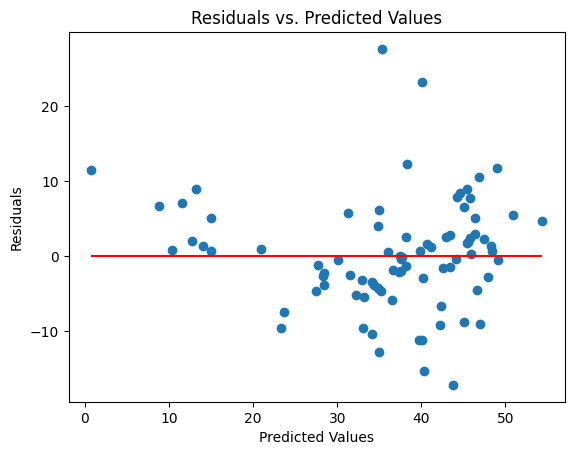

In [ ]:
# 2. Residual Independence and Homoscedasticity: Residuals vs Predicted Values
residuals = Y_test - Y_pred
plt.scatter(Y_pred, residuals)
plt.hlines(y=0, xmin=Y_pred.min(), xmax=Y_pred.max(), colors='red')
plt.title("Residuals vs. Predicted Values")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 2.2 Checking Residuals for INDEPENDENCE i.e., Random Distribution:
Purpose: The below plot shows how residuals behave across different levels of the independent variable (X3 distance to the nearest MRT station). It helps in checking if the spread of residuals (homoscedasticity) and their pattern (residual independence) vary systematically with the predictor.

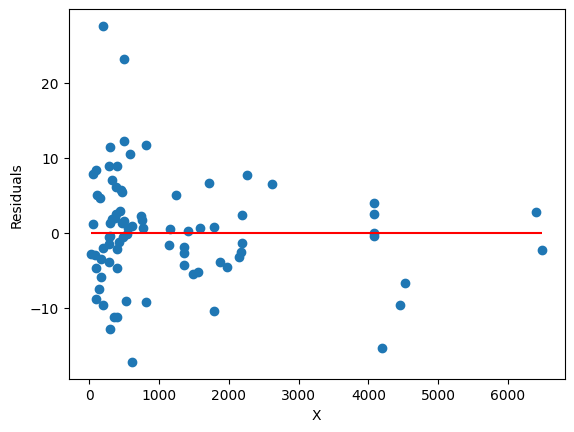

In [ ]:
# Residuals vs. Sorted Independent Variable
import matplotlib.pyplot as plt

residuals = Y_test - Y_pred
plt.scatter(X_test_sorted, residuals)
plt.hlines(y=0, xmin=X_test_sorted.min(), xmax=X_test_sorted.max(), colors='red')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()


Which one to choose?<br/>
<b>Residuals vs. Predicted Values:</b> This check could be used for any overall pattern or structure in residuals across the range of predicted values. This helps in confirming if the model assumptions regarding residual independence are met.

<b> Residuals vs. Sorted Independent Variable:</b>  This could be used when we  suspect that the variance or pattern of residuals might vary systematically with the independent variable. This is useful for diagnosing homoscedasticity and residual independence across different levels of the predictor.

Both plots can provide valuable insights into the performance and assumptions of your regression model. The choice depends on the specific aspect of the residuals you want to investigate based on the context of your analysis

# 3. Checking the Homoscedasticity

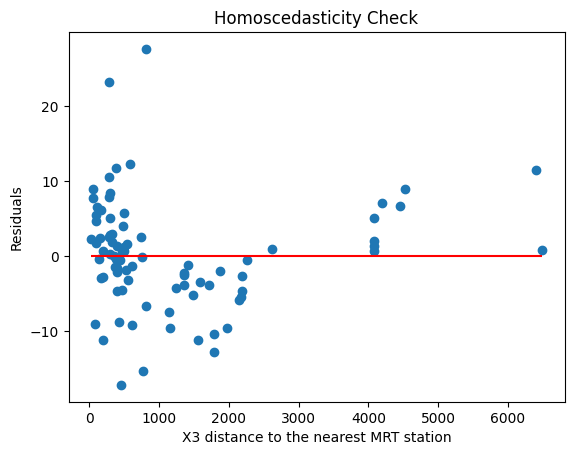

In [ ]:
# Sorting for visualization purposes
X_test_values = X_test.loc[:, 'X3 distance to the nearest MRT station'].values
sorted_idx = np.argsort(X_test_values)
X_test_sorted = X_test_values[sorted_idx]
residuals_sorted = residuals.values[sorted_idx]

plt.scatter(X_test_sorted, residuals_sorted)
plt.hlines(y=0, xmin=X_test_sorted.min(), xmax=X_test_sorted.max(), colors='red')
plt.title("Homoscedasticity Check")
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Residuals')
plt.show()


#4. Checking the Normality of Residuals using Q-Q plot and Histogram

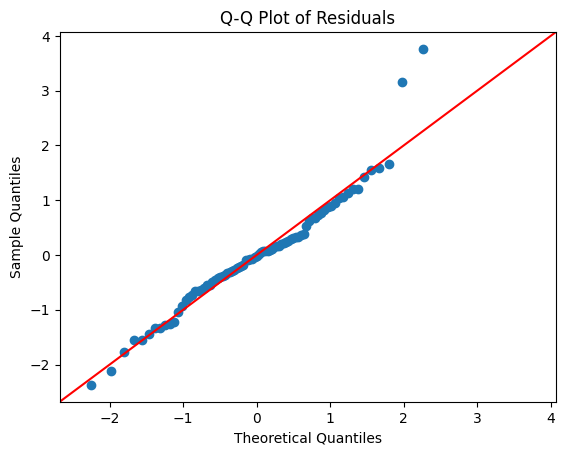

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm

# Plotting the Q-Q plot
sm.qqplot(residuals, line='45' , fit=True, dist=stats.norm)
plt.title('Q-Q Plot of Residuals')
plt.show()


#Plotting the Histogram on Rsiduals to see the Notmality Distibution (Gausssian Distibution)

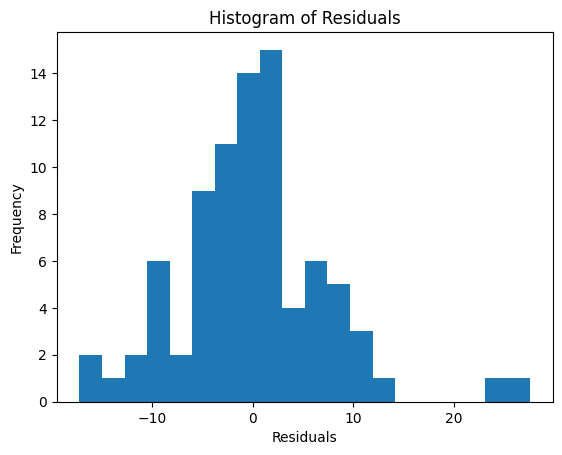

In [ ]:
# Plotting the Histogram on Rsiduals to see the Notmality Distibution (Gausssian Distibution)

plt.hist(residuals, bins= 20)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Among the four assumptions, the 3 assumptions on the residuals proves the model could perform fairly. However, the first assumption  - Linearity assumption, shows a zagged Linear Regression line which interprets that the data could be trained any other Regression model for better performance.

<b>Residuals Assumption:</b> If the residuals show no obvious pattern (independence), have a constant spread (homoscedasticity), and are approximately normally distributed, it indicates that the model's predictions are unbiased and reliable. This is a key indicator of whether the model performs well in terms of prediction accuracy.

<b>Linearity Assumption:</b> If the linearity assumption appears to be violated (e.g., the regression line is jagged), it suggests that the relationship between the predictors and the response may not be adequately captured by a simple linear model. In such cases, exploring other regression models that can capture nonlinear relationships might improve model performance.

The assumptions on the residuals (independence, homoscedasticity, normality) are critical for ensuring the reliability and accuracy of the model's predictions. If these assumptions hold, it suggests that the linear regression model performs well in terms of prediction. On the other hand, if the linearity assumption is violated, exploring alternative regression models might lead to better performance by capturing more complex relationships in the data.

By systematically checking these assumptions and interpreting their implications, you can make informed decisions about the adequacy of your linear regression model and potential avenues for improvement

In [ ]:
X_train.head()

X1 transaction date  X2 house age  \
192          2013.166667          43.8   
234          2013.250000           8.0   
5            2012.666667           7.1   
45           2013.083333          36.6   
245          2013.416667           7.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
192                                57.58945                                7   
234                              2216.61200                                4   
5                                2175.03000                                3   
45                                488.81930                                8   
245                               639.61980                                5   

     X5 latitude  X6 longitude  
192     24.96750     121.54069  
234     24.96007     121.51361  
5       24.96305     121.51254  
45      24.97015     121.54494  
245     24.97258     121.54814

In [ ]:
# TESTING THE MODEL WITH A NEW VALUE
raw_data = np.array([[2012.917,32,84.87882,10,24.98298,121.54024]])
prediction1= model.predict(raw_data)
print("Prediction1:", prediction1)

Prediction1: [47.0160782]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
